# Part 4- A/B Testing
1. Using “AB_Test” sheet in the shared excel file, what is the possible metric you can create for A/B testing excluding no. of clicks and no. of visitors. (Any derived metric from the given no.of clicks and visitors)
2. Perform an AB testing to find which variation whether control or treatment is better.

Import all libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  4.1 Using “AB_Test” sheet in the shared excel file, what is the possible metric you can create for A/B testing excluding no. of clicks and no. of visitors. (Any derived metric from the given no.of clicks and visitors )



Load the data

In [50]:
# Reading the dataset
df = pd.read_excel("../data/assignment.xlsx", sheet_name="AB_Test")

# Displaying the data
df.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177


## Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### Check Missing values

In [38]:
df.isna().sum()

Date          0
Address       0
Variations    0
DeviceType    0
Clicks        0
Visitors      0
dtype: int64

There are no missing values in the data set

### Check Duplicates



In [39]:
df.duplicated().sum()

0

There are no duplicate values in the data set

### Check Data Types



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        18099 non-null  datetime64[ns]
 1   Address     18099 non-null  object        
 2   Variations  18099 non-null  object        
 3   DeviceType  18099 non-null  object        
 4   Clicks      18099 non-null  int64         
 5   Visitors    18099 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 848.5+ KB


### Check number of unique values in each column



In [41]:
df.nunique()

Date            18
Address        211
Variations       2
DeviceType       4
Clicks         722
Visitors      1705
dtype: int64

### Check Statistics of Dataset



In [53]:
df.describe()

,Clicks,Visitors
count,18099.000000,18099.000000
mean,55.521023,479.477485
std,377.760167,5705.466343
min,0.000000,1.000000
25%,0.000000,3.000000
50%,2.000000,13.000000
75%,12.000000,79.000000
max,11190.000000,211849.000000


In [189]:
df.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177


In [226]:
new_df = df.drop(columns=["DeviceType", "Address"])
new_df = new_df.groupby(by=["Variations", "Date"]).sum()
new_df["Interaction Rate"] = new_df["Clicks"] / new_df["Visitors"]
new_df.head()

Clicks  Visitors  Interaction Rate
Variations Date                                          
Control    2023-03-29   50405    498197          0.101175
           2023-03-30   46887    453442          0.103402
           2023-03-31   47251    482210          0.097988
           2023-04-01   34902    374771          0.093129
           2023-04-02   34312    362153          0.094744

###  4.2 Perform an AB testing to find which variation whether control or treatment is better.

In [227]:
new_df = new_df.reset_index().pivot_table(index="Date", columns="Variations", values="Interaction Rate")
new_df.reset_index()

Variations,Date,Control,Treatment
0,2023-03-29,0.101175,0.241116
1,2023-03-30,0.103402,0.249690
2,2023-03-31,0.097988,0.240635
3,2023-04-01,0.093129,0.215076
4,2023-04-02,0.094744,0.208578
5,2023-04-03,0.113199,0.261988
6,2023-04-04,0.115882,0.253008
7,2023-04-05,0.117796,0.255065
8,2023-04-06,0.097732,0.234196
9,2023-04-07,0.098109,0.230220


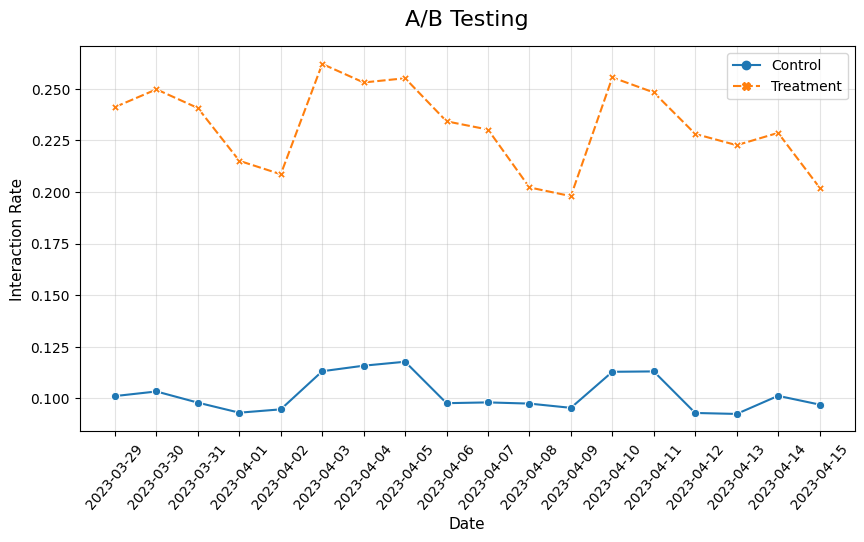

In [225]:
plt.figure(figsize=(10,5))
sns.lineplot(new_df, markers=True)
plt.xticks(new_df.reset_index()["Date"],rotation=50)
plt.legend()
plt.xlabel("Date", fontsize=11)
plt.ylabel("Interaction Rate", fontsize=11)
plt.title("A/B Testing", fontsize=16, pad=15)
plt.grid(True, alpha=0.35)
plt.show()

In [184]:
plot_df = df.groupby(by="Variations").count()["Visitors"]
# df.groupby(by="Variations").count()["Date"].plot(kind="pie", subplots=True, autopct=True)
plot_df

Variations
Control      10547
Treatment     7552
Name: Visitors, dtype: int64